**Data Analysis and Visualization using Advanced Excel.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
excel_file = "sales_data.xlsx"
sales_df = pd.read_excel(excel_file, sheet_name="Sales")
customers_df = pd.read_excel(excel_file, sheet_name="Customers")
products_df = pd.read_excel(excel_file, sheet_name="Products")


In [6]:
print("Sales Data:")
display(sales_df.head())

Sales Data:


,OrderID,CustomerID,Product,Quantity,Price,OrderDate,Region,TotalRevenue
0,1,413,Keyboard,5,1815.96,2023-01-01,South,9079.80
1,2,500,Smartphone,6,1497.86,2023-01-02,South,8987.16
2,3,925,Smartphone,1,465.75,2023-01-03,North,465.75
3,4,55,Monitor,3,1896.86,2023-01-04,East,5690.58
4,5,502,Smartphone,5,1725.11,2023-01-05,South,8625.55


In [8]:
print("\nCustomers Data:")
display(customers_df.head())



Customers Data:


,CustomerID,CustomerName,Region
0,1,Customer_1,West
1,2,Customer_2,South
2,3,Customer_3,West
3,4,Customer_4,East
4,5,Customer_5,West


In [10]:
print("\nProducts Data:")
display(products_df.head())


Products Data:


,Product,Price
0,Laptop,1500
1,Tablet,500
2,Smartphone,1200
3,Monitor,300
4,Keyboard,50


In [12]:
sales_df.drop_duplicates(inplace=True)


In [16]:
sales_df["Quantity"] = sales_df["Quantity"].fillna(0)


In [18]:
sales_df["OrderDate"] = pd.to_datetime(sales_df["OrderDate"])

In [20]:
# VLOOKUP: Merge Customer Name into Sales Data
sales_df = pd.merge(sales_df, customers_df, on="CustomerID", how="left")

In [22]:
# VLOOKUP: Merge Product Price into Sales Data
sales_df = pd.merge(sales_df, products_df, on="Product", how="left")

In [24]:
print("\nMerged Data with Revenue:")
display(sales_df.head())



Merged Data with Revenue:


,OrderID,CustomerID,Product,Quantity,Price_x,OrderDate,Region_x,TotalRevenue,CustomerName,Region_y,Price_y
0,1,413,Keyboard,5,1815.96,2023-01-01,South,9079.80,Customer_413,South,50
1,2,500,Smartphone,6,1497.86,2023-01-02,South,8987.16,Customer_500,North,1200
2,3,925,Smartphone,1,465.75,2023-01-03,North,465.75,Customer_925,South,1200
3,4,55,Monitor,3,1896.86,2023-01-04,East,5690.58,Customer_55,South,300
4,5,502,Smartphone,5,1725.11,2023-01-05,South,8625.55,Customer_502,West,1200


In [26]:
# Step 4: PivotTables (Excel-like Summarization)
# ----------------------------------------

# Create a PivotTable: Total Revenue by Region and Product
pivot_table = pd.pivot_table(
    sales_df,
    values="TotalRevenue",
    index="Region_x",
    columns="Product",
    aggfunc="sum",
    fill_value=0
)


In [28]:
print("\nPivotTable (Revenue by Region & Product):")
display(pivot_table)



PivotTable (Revenue by Region & Product):


Product,Keyboard,Laptop,Monitor,Smartphone,Tablet
Region_x,,,,,
East,2496402.98,2325639.45,2650384.26,2561689.35,2503484.71
North,2621697.05,2652925.56,2241453.22,2472203.75,3010931.54
South,2695977.84,2626530.41,2652228.88,2726864.73,2769039.61
West,2786048.14,2570569.77,2888205.42,2673185.67,2591883.76


C:\Users\pande\AppData\Local\Temp\ipykernel_7908\335110993.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales_df, x="Product", y="TotalRevenue", estimator=sum, ci=None)


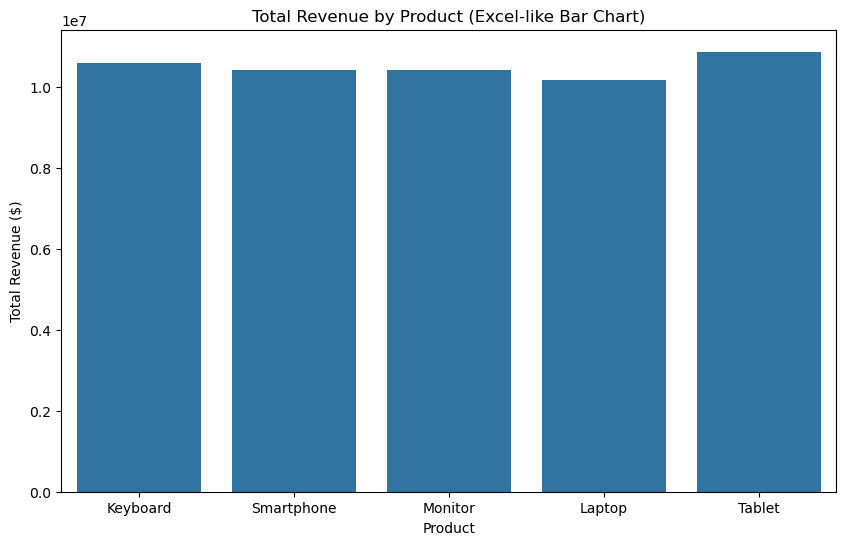

In [31]:
# ----------------------------------------
# Step 5: Visualization (Excel-like Charts)
# ----------------------------------------

# Bar Chart: Total Revenue by Product
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_df, x="Product", y="TotalRevenue", estimator=sum, ci=None)
plt.title("Total Revenue by Product (Excel-like Bar Chart)")
plt.xlabel("Product")
plt.ylabel("Total Revenue ($)")
plt.show()
